# **Brain Tumor Classification Using Convolutional Neural Network**

In this notebook, we will write code for pre-processing brain MRI image data and passing it through our Convolutional Neural Network.

# **Import Statements**

In [ ]:
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import os
import keras
import zipfile

# **Unzip the data**

In [ ]:
def unzip_file(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

zip_file_path = 'k2.zip'
extract_to = '/'
unzip_file(zip_file_path, extract_to)

# **Image Preprocessing Pipeline**

In [ ]:

# Image data generators for loading and augmenting data
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


# **Defining training and testing data**

In [ ]:


# Directory paths
train_dir = './k2/Training'
valid_dir = './k2/Testing'


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(244, 244),
    batch_size=20,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(244, 244),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


# **Defining Convolutional Neural Network and compile the model**

In [ ]:

# Add custom layers on top of the base model
model = Sequential([
        ## hear we difining the input layers
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=( 244, 244, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),


    # hear we difing the flatten layer
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])


# **Creating call back function**

In [ ]:
class callbacks(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > .9900 ):
            print("Model going to overfit")
            self.model.stop_training = True

callback = callbacks()

# **Fit the data to the model and save it**

In [ ]:

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[callback],
    epochs=200
)

# Save the trained model
model.save('brain_tumor_classifier.h5')


Epoch 1/200
100/100 [==============================] - 33s 300ms/step - loss: 0.6692 - accuracy: 0.5800 - val_loss: 0.6915 - val_accuracy: 0.5100
Epoch 2/200
100/100 [==============================] - 33s 330ms/step - loss: 0.6653 - accuracy: 0.5920 - val_loss: 0.6437 - val_accuracy: 0.6567
Epoch 3/200
100/100 [==============================] - 31s 304ms/step - loss: 0.6344 - accuracy: 0.6470 - val_loss: 0.6679 - val_accuracy: 0.6017
Epoch 4/200
100/100 [==============================] - 32s 323ms/step - loss: 0.5941 - accuracy: 0.6855 - val_loss: 0.7937 - val_accuracy: 0.5950
Epoch 5/200
100/100 [==============================] - 31s 307ms/step - loss: 0.5328 - accuracy: 0.7460 - val_loss: 0.6476 - val_accuracy: 0.6983
Epoch 6/200
100/100 [==============================] - 33s 328ms/step - loss: 0.4814 - accuracy: 0.7660 - val_loss: 0.5364 - val_accuracy: 0.7650
Epoch 7/200
100/100 [==============================] - 30s 302ms/step - loss: 0.4586 - accuracy: 0.7815 - val_loss: 0.6764 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Evaluate the model with test data**
# **Print Classification Report & Confusion Matrix**

Found 600 images belonging to 2 classes.
29/31 [===========================>..] - ETA: 0s

29/31 [===========================>..] - ETA: 0s - loss: 0.0811 - accuracy: 0.9759

31/31 [==============================] - 1s 34ms/step - loss: 0.0784 - accuracy: 0.9767
Validation Loss: 0.07839284092187881
Validation Accuracy: 0.9766666889190674
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       300
           1       0.96      0.99      0.98       300

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

Confusion Matrix:
 [[288  12]
 [  2 298]]


Text(95.72222222222221, 0.5, 'Truth')

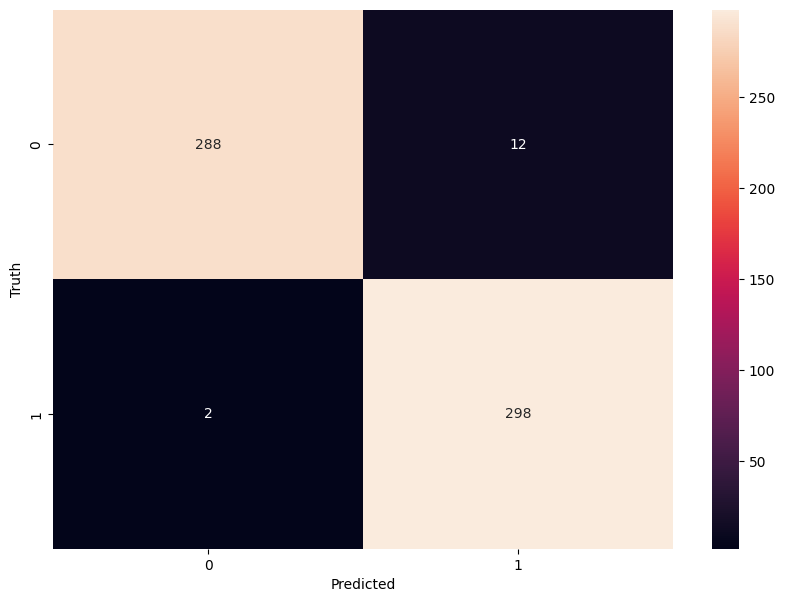

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sb

# Load the trained model
model = load_model('brain_tumor_classifier_3.h5')

# Directory path for validation data
valid_dir = './k2/Testing'

# Image data generator for validation data
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(244, 244),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

# Predict the validation data
valid_generator.reset()
predictions = model.predict(valid_generator, steps=valid_generator.samples // valid_generator.batch_size + 1)
predicted_classes = (predictions > 0.5).astype(int).ravel()

# Ground truth labels
true_classes = valid_generator.classes
class_labels = list(valid_generator.class_indices.keys())

# Evaluation
evaluation = model.evaluate(valid_generator, steps=valid_generator.samples // valid_generator.batch_size + 1)
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize = (10,7))
sb.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Print chart for accuracy, validation accuracy, loss and validation loss**

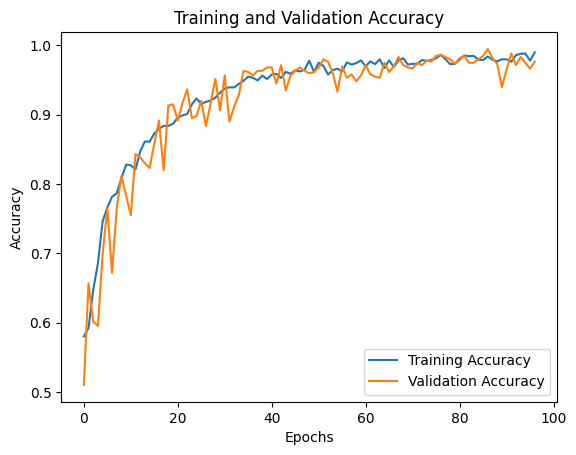

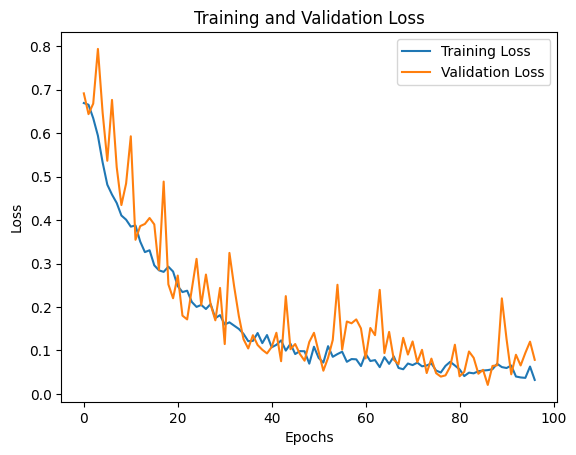

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# Plotting training and validation accuracy
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

# Plotting training and validation loss
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()

# Show plots
plt.show()
